In [10]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('../../Cleaning/Individuals_Results/individuals_combined.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         326 non-null    object 
 1   Competition  326 non-null    object 
 2   Round        326 non-null    object 
 3   VT           326 non-null    float64
 4   UB           326 non-null    float64
 5   BB           326 non-null    float64
 6   FX           326 non-null    float64
 7   AA           326 non-null    float64
 8   Name         326 non-null    object 
dtypes: float64(5), object(4)
memory usage: 23.0+ KB


In [5]:
df

,Date,Competition,Round,VT,UB,BB,FX,AA,Name
0,2021-07-23,Olympic Games,EF,0.000,0.000,14.000,0.000,0.000,Simone Biles
1,2021-07-23,Olympic Games,TF,13.766,0.000,0.000,0.000,0.000,Simone Biles
2,2021-07-23,Olympic Games,QF,14.966,14.566,14.066,14.133,57.731,Simone Biles
3,2021-06-24,U.S. Olympic Trials,AA,15.400,13.833,13.700,14.600,57.533,Simone Biles
4,2021-06-24,U.S. Olympic Trials,QF,15.466,14.600,15.133,15.366,60.565,Simone Biles
...,...,...,...,...,...,...,...,...,...
321,2022-07-29,U.S. Classic,AA,14.400,12.850,13.550,13.600,54.400,Leanne Wong
322,2023-08-24,U.S. Championships,AA,14.050,14.000,13.700,14.000,55.750,Leanne Wong
323,2023-08-24,U.S. Championships,QF,14.250,14.000,13.750,13.350,55.350,Leanne Wong
324,2023-08-04,U.S. Classic,AA,14.150,13.750,12.700,13.500,54.100,Leanne Wong


In [6]:
 aa = df[df['AA'] > 0]

In [7]:
 apps = df[df['AA'] == 0]

In [8]:
aa

,Date,Competition,Round,VT,UB,BB,FX,AA,Name
2,2021-07-23,Olympic Games,QF,14.966,14.566,14.066,14.133,57.731,Simone Biles
3,2021-06-24,U.S. Olympic Trials,AA,15.400,13.833,13.700,14.600,57.533,Simone Biles
4,2021-06-24,U.S. Olympic Trials,QF,15.466,14.600,15.133,15.366,60.565,Simone Biles
5,2021-06-03,U.S. Championships,AA,15.550,14.700,14.900,14.950,60.100,Simone Biles
6,2021-06-03,U.S. Championships,QF,15.800,14.750,14.350,14.650,59.550,Simone Biles
...,...,...,...,...,...,...,...,...,...
321,2022-07-29,U.S. Classic,AA,14.400,12.850,13.550,13.600,54.400,Leanne Wong
322,2023-08-24,U.S. Championships,AA,14.050,14.000,13.700,14.000,55.750,Leanne Wong
323,2023-08-24,U.S. Championships,QF,14.250,14.000,13.750,13.350,55.350,Leanne Wong
324,2023-08-04,U.S. Classic,AA,14.150,13.750,12.700,13.500,54.100,Leanne Wong


NameError: name 'x' is not defined

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_27261/1497986291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa["Year"] = pd.to_datetime(aa["Date"]).dt.year


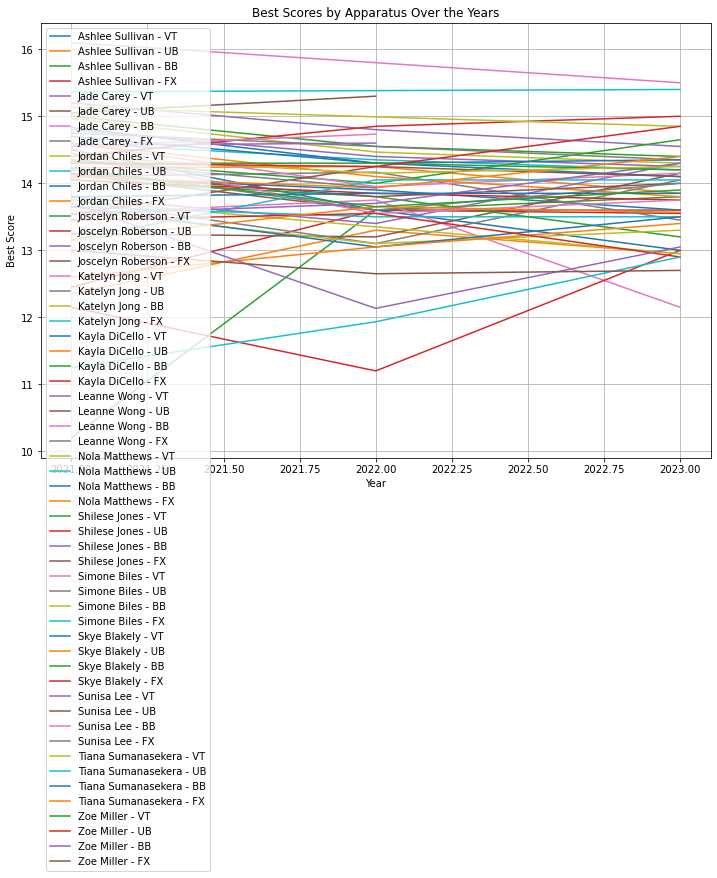

In [11]:
# Extract the year from the "Date" column
aa["Year"] = pd.to_datetime(aa["Date"]).dt.year

# Group by Year and Name, then find the maximum score for each apparatus
max_scores = aa.groupby(["Year", "Name"]).max().reset_index()

# List of unique names (individuals)
names = max_scores["Name"].unique()

# Plot each person's best scores for each apparatus over the years
plt.figure(figsize=(12, 8))

for name in names:
    person_data = max_scores[max_scores["Name"] == name]
    years = person_data["Year"].tolist()
    vt_scores = person_data["VT"].tolist()
    ub_scores = person_data["UB"].tolist()
    bb_scores = person_data["BB"].tolist()
    fx_scores = person_data["FX"].tolist()

    plt.plot(years, vt_scores, label=f"{name} - VT")
    plt.plot(years, ub_scores, label=f"{name} - UB")
    plt.plot(years, bb_scores, label=f"{name} - BB")
    plt.plot(years, fx_scores, label=f"{name} - FX")

plt.xlabel("Year")
plt.ylabel("Best Score")
plt.title("Best Scores by Apparatus Over the Years")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


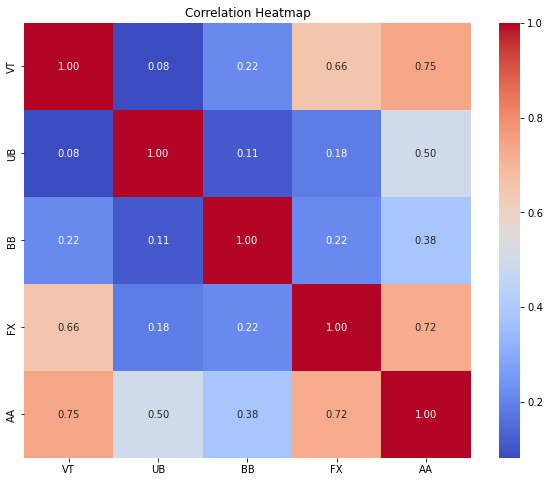

In [14]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
numeric_df = df.select_dtypes(include=['number'])  
correlation_matrix = numeric_df.corr()


In [16]:
correlation_matrix

,VT,UB,BB,FX,AA
VT,1.000000,0.081600,0.217589,0.655007,0.745094
UB,0.081600,1.000000,0.111955,0.184721,0.495229
BB,0.217589,0.111955,1.000000,0.215024,0.381081
FX,0.655007,0.184721,0.215024,1.000000,0.724330
AA,0.745094,0.495229,0.381081,0.724330,1.000000


# The better one is at Vault and/or Floor then the better their AA score will be

## Floor and Vault have a moderate correlation 